In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouseDATA=pd.read_csv(mouse_drug_data_to_load)
clinicalDATA=pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
MCData=mouseDATA.merge(clinicalDATA,on='Mouse ID')

# Display the data table for preview

MCData.head(3)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drugTimepoint=MCData.groupby(["Drug","Timepoint"]).mean()
drugTimepoint
# Convert to DataFrame
drugTimepointMean=pd.DataFrame(drugTimepoint["Tumor Volume (mm3)"])
# Preview DataFrame
drugTimepointMean.head(3)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drugTimepoint_t=MCData.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
drugTimepointSTD=pd.DataFrame(drugTimepoint_t["Tumor Volume (mm3)"])

# Preview DataFrame
drugTimepointSTD.head(3)

# Minor Data Munging to Re-Format the Data Frames
tableTumorError=pd.pivot_table(drugTimepointSTD, values='Tumor Volume (mm3)', index=['Timepoint'],
                     columns=['Drug'], aggfunc=np.mean)
# Preview that Reformatting worked

tableTumorError.head(3)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tableMean=pd.pivot_table(drugTimepointMean, values='Tumor Volume (mm3)', index=['Timepoint'],
                     columns=['Drug'], aggfunc=np.mean)
# Preview that Reformatting worked

tableMean.head(3)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881


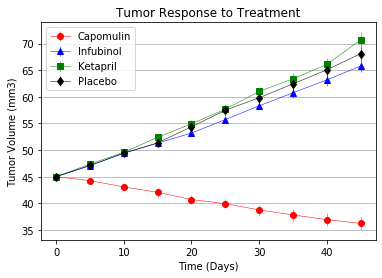

In [5]:
#plotting Tumor Response to Treatment

#defining axis:
x_axis=tableMean.index
y1=tableMean["Capomulin"]
y2=tableMean["Infubinol"]
y3=tableMean["Ketapril"]
y4=tableMean["Placebo"]

#defining standard error
ey1=tableTumorError["Capomulin"]
ey2=tableTumorError["Infubinol"]
ey3=tableTumorError["Ketapril"]
ey4=tableTumorError["Placebo"]

#plotting the axises
plt.errorbar(x_axis, y1,marker ='o', yerr=ey1, color='red', linewidth=0.5, label="Capomulin")
plt.errorbar(x_axis, y2,marker ='^',  yerr=ey2,color='blue', linewidth=0.5, label="Infubinol")
plt.errorbar(x_axis, y3,marker ='s',  yerr=ey3,color='green', linewidth=0.5, label="Ketapril")
plt.errorbar(x_axis, y4,marker ='d',  yerr=ey4,color='black', linewidth=0.5, label="Placebo")
plt.grid(axis='y')

#adding legend and titles
plt.legend(loc='best') 
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("../Images/TumorSizes.png")


## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame
drugTMetastatic=pd.DataFrame(drugTimepoint["Metastatic Sites"])

# Preview DataFrame
drugTMetastatic.head(3)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                      0.00
          5                      0.16
          10                     0.32

In [7]:
drugTMetastaticMean=pd.pivot_table(drugTMetastatic, values='Metastatic Sites', index=['Timepoint'],
                     columns=['Drug'], aggfunc=np.mean)

# Preview that Reformatting worked
drugTMetastaticMean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
drugTMetastaticSTD=pd.DataFrame(drugTimepoint_t["Metastatic Sites"])
# Convert to DataFrame
# Preview DataFrame
drugTMetastaticSTD.head(3)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433

In [9]:
# Minor Data Munging to Re-Format the Data Frames

METAtableSTD=pd.pivot_table(drugTMetastaticSTD, values='Metastatic Sites', index=['Timepoint'],
                     columns=['Drug'], aggfunc=np.mean)

# Preview that Reformatting worked
METAtableSTD.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


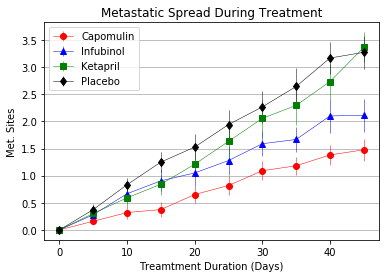

In [10]:
# Plot Metastatic Response to Treatment

#defining axis:
x_axis=drugTMetastaticMean.index
y1=drugTMetastaticMean["Capomulin"]
y2=drugTMetastaticMean["Infubinol"]
y3=drugTMetastaticMean["Ketapril"]
y4=drugTMetastaticMean["Placebo"]

#defining standard error
ey1=METAtableSTD["Capomulin"]
ey2=METAtableSTD["Infubinol"]
ey3=METAtableSTD["Ketapril"]
ey4=METAtableSTD["Placebo"]

#plotting the axises
plt.errorbar(x_axis, y1,marker ='o', yerr=ey1, color='red', linewidth=0.5, label="Capomulin")
plt.errorbar(x_axis, y2,marker ='^',  yerr=ey2,color='blue', linewidth=0.5, label="Infubinol")
plt.errorbar(x_axis, y3,marker ='s',  yerr=ey3,color='green', linewidth=0.5, label="Ketapril")
plt.errorbar(x_axis, y4,marker ='d',  yerr=ey4,color='black', linewidth=0.5, label="Placebo")
plt.grid(axis='y')

#adding legend and titles
plt.legend(loc='best') 
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treamtment Duration (Days)")
plt.ylabel("Met. Sites")
plt.savefig("../Images/Metastatic.png")


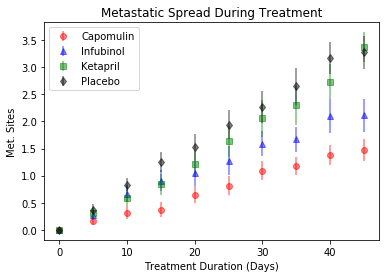

In [11]:
#plot No.2

ey1=METAtableSTD["Capomulin"]
ey2=METAtableSTD["Infubinol"]
ey3=METAtableSTD["Ketapril"]
ey4=METAtableSTD["Placebo"]

plt.errorbar(x_axis, y1, yerr=ey1, fmt="o", color="r", alpha=0.5, label="Capomulin") 
plt.errorbar(x_axis, y2, yerr=ey2, fmt="^", color="b", alpha=0.5, label="Infubinol") 
plt.errorbar(x_axis, y3, yerr=ey3, fmt="s", color="g", alpha=0.5, label="Ketapril") 
plt.errorbar(x_axis, y4, yerr=ey4, fmt="d", color="black", alpha=0.5, label="Placebo") 
plt.legend(loc='best') 
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
#plt.grid(axis='y')

plt.savefig("../Images/MetaStatic_2.png")

plt.show()


## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [13]:
miceData=MCData.groupby(['Drug', 'Timepoint']).size().reset_index(name='counts')
miceData.head(3)

,Drug,Timepoint,counts
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25


In [14]:
# Minor Data Munging to Re-Format the Data Frames
miceDataTable=pd.pivot_table(miceData, values='counts', index=['Timepoint'],
                     columns=['Drug'])

# Preview the Data Frame
miceDataTable.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


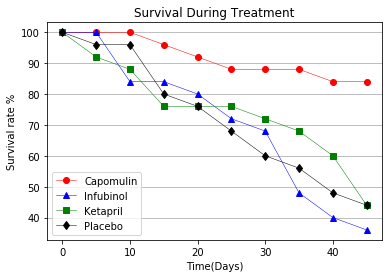

In [15]:
# Generate the Plot (Accounting for percentages)
miceDataTablePercentage=(miceDataTable/miceDataTable.iloc[0,:])*100

#defining axis:
x_axis=miceDataTablePercentage.index
y1=miceDataTablePercentage["Capomulin"]
y2=miceDataTablePercentage["Infubinol"]
y3=miceDataTablePercentage["Ketapril"]
y4=miceDataTablePercentage["Placebo"]

#plotting the axises
plt.plot(x_axis, y1,marker ='o', color='red', linewidth=0.5, label="Capomulin")
plt.plot(x_axis, y2,marker ='^',color='blue', linewidth=0.5, label="Infubinol")
plt.plot(x_axis, y3,marker ='s',color='green', linewidth=0.5, label="Ketapril")
plt.plot(x_axis, y4,marker ='d',color='black', linewidth=0.5, label="Placebo")
plt.legend(loc='best') 

plt.grid(axis='y')

#adding legend and titles
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival rate %")

# Show the Figure
plt.savefig("../Images/SurvivalPercentage.png")

plt.show()


## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
''' The percentage change is calculated using this fomula:
The average tumor size at timepoint (45) - The average tumor size at timepoint 0 divided by the average tumor size at timepoint 0.
This will give us the percentage change of average tumor size over time'''

# The percentage change is 
tableMean_reduced=tableMean[["Capomulin", "Infubinol","Ketapril","Placebo"]]

tumorchangePercent=((tableMean_reduced.loc[45]-tableMean_reduced.loc[0])/tableMean_reduced.loc[45])*100
tumorchangePercent=pd.DataFrame(data=tumorchangePercent,index=None,columns=["Percent change of Tumor size"])
tumorchangePercent

tumorchangePercent

,Percent change of Tumor size
Drug,
Capomulin,-24.185502
Infubinol,31.564725
Ketapril,36.317412
Placebo,33.905256


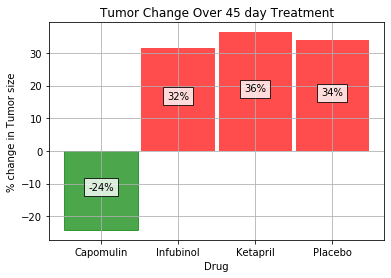

In [17]:
# Display the data to confirm

#defining axis:

y=tumorchangePercent["Percent change of Tumor size"]
x_axis=[]
for x in tumorchangePercent.index:
    x_axis.append(x)
    

#plotting the axises

graph=plt.bar(x_axis, y, color='r', width=-0.95,align="center", alpha=0.7)
graph[0].set_color('g')

#adding titles

plt.title("Tumor Change Over 45 day Treatment")
plt.xlabel("Drug")
plt.ylabel("% change in Tumor size")
plt.grid()

#adding labels
#Labels will be added at the mid-height of any column.

labels=[]
for i in y:
    v=round(i)
    labels.append(f"{v}%")

for z in range(0,len(x_axis)):
    height= np.sign(y[z])*(np.absolute((y[z]/2)))
    plt.text(z,height, labels[z], 
             horizontalalignment='center',
             verticalalignment='baseline',
             bbox=dict(facecolor='white', alpha=0.8))

plt.savefig("../Images/Change.png")
  
